# Applicarion of Naive_Bayes Algorithm

The central idea of this work is to use the Naive Bayes algorithm to classify a good or bad payer for a possible bank loan, based on the features present in the data set. 

In [5]:
# Install the yellowbrick package 

#!pip install yellowbrick

In [137]:
# Import library 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix, classification_report, ClassificationReport

In [141]:
# Importing dataset
df = pd.read_csv('Credit.csv')
df.shape

(1000, 21)

In [142]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [143]:
# Creatin the Matrix

predict = df.iloc[:, 0:20].values
classification = df.iloc[:,20]

In [144]:
# Transformation of categorical attributes into numeric attributes, passing the index of each categorical column
# We need to create an object for each categorical attribute because next, 
# we will run the encoding process again for the test record
# If different objects are used, the number assigned to each value may be different, which will make the test inconsistent



In [145]:
labelencoder1 = LabelEncoder()
predict[:, 0] = labelencoder1.fit_transform(predict[:, 0])

labelencoder2 = LabelEncoder()
predict[:,2] = labelencoder2.fit_transform(predict[:,2])

labelencoder3 = LabelEncoder()
predict[:, 3] = labelencoder3.fit_transform(predict[:, 3])

labelencoder4 = LabelEncoder()
predict[:, 5] = labelencoder4.fit_transform(predict[:, 5])

labelencoder5 = LabelEncoder()
predict[:, 6] = labelencoder5.fit_transform(predict[:, 6])

labelencoder6 = LabelEncoder()
predict[:, 8] = labelencoder6.fit_transform(predict[:, 8])

labelencoder7 = LabelEncoder()
predict[:, 9] = labelencoder7.fit_transform(predict[:, 9])

labelencoder8 = LabelEncoder()
predict[:, 11] = labelencoder8.fit_transform(predict[:, 11])

labelencoder9 = LabelEncoder()
predict[:, 13] = labelencoder9.fit_transform(predict[:, 13])

labelencoder10 = LabelEncoder()
predict[:, 14] = labelencoder10.fit_transform(predict[:, 14])

labelencoder11 = LabelEncoder()
predict[:, 16] = labelencoder11.fit_transform(predict[:, 16])

labelencoder12 = LabelEncoder()
predict[:, 18] = labelencoder12.fit_transform(predict[:, 18])

labelencoder13 = LabelEncoder()
predict[:, 19] = labelencoder13.fit_transform(predict[:, 19])

In [146]:
#Cheking the tranformation

predict[1,:]

array([1, 48, 3, 7, 5951, 3, 0, 2, 0, 2, 2, 2, 22, 1, 1, 1, 3, 1, 0, 1],
      dtype=object)

In [147]:
# split the dataset TRAIN(70%) and TEST(30%)

X_train, X_test, y_train, y_test = train_test_split(predict, classification,
                                                   test_size = 0.3,
                                                   random_state = 0)
X_test

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [148]:
# Creation and training of the model (generation of the probability table)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [149]:
# Forecasts using test records

model_predict = naive_bayes.predict(X_test)
model_predict


array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

# Model Evaluation

In [150]:
# Confusion matrix and calculation of the ACCURACY and ERRO rate
# a confrontation between historical data and model prediction

confusion = confusion_matrix(y_test, model_predict)
confusion

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [151]:
acurracy = accuracy_score(y_test, model_predict)
acurracy

0.71

In [152]:
erro = 1 - acurracy
erro

0.29000000000000004

## Model Evaluation by yellowbrick

C:\Users\laidson\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


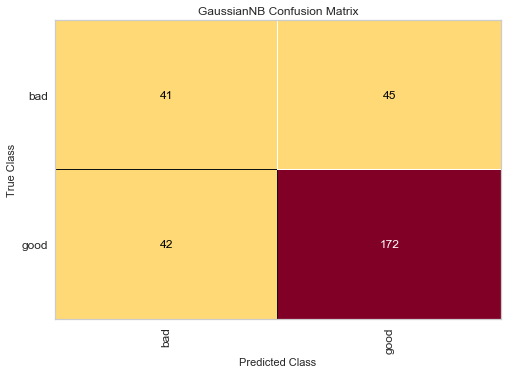

In [165]:
# Confusion matrix Visualization using yellowbrick

i = ConfusionMatrix(GaussianNB())
i.fit(X_train, y_train)
i.score(X_test, y_test)
i.poof()

C:\Users\laidson\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


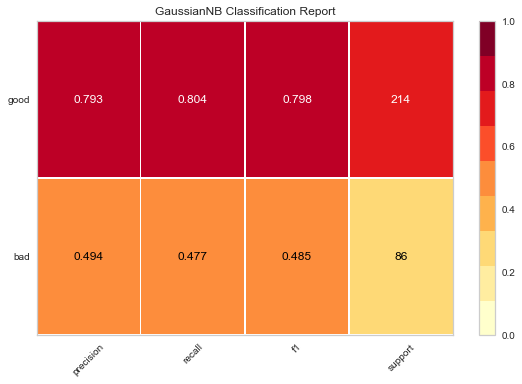

In [159]:
classes = ['bad', 'good']
v = classification_report( GaussianNB(), X_train, y_train, X_test, y_test, classes=classes, support=True)

## Model Evaluation by sklearn.metrics

In [194]:
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score

In [195]:
classes=['bad', 'good']
print(classification_report(y_test, model_predict, target_names=classes))

              precision    recall  f1-score   support

         bad       0.49      0.48      0.49        86
        good       0.79      0.80      0.80       214

    accuracy                           0.71       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.71      0.71      0.71       300



# Transforming into binaries

In [196]:
# BAD = 1 and GOOD = 0
j = pd.get_dummies(model_predict)
j = j['bad']
j

0      1
1      0
2      0
3      0
4      1
      ..
295    0
296    1
297    0
298    1
299    0
Name: bad, Length: 300, dtype: uint8

In [200]:
i = pd.get_dummies(y_test)
i = i['bad']
i

993    0
859    0
298    0
553    0
672    0
      ..
167    0
998    1
984    0
491    1
10     1
Name: bad, Length: 300, dtype: uint8

In [204]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(i, j)

In [205]:
# AUC value
auc(false_positive_rate, true_positive_rate)

0.6402412519017605

In [206]:
roc_auc_score(i, j)

0.6402412519017605

In [ ]:
!pip install scikitplot

In [207]:
import scikitplot as skplt
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'scikitplot'

# Application of the trained model to a new data set

In [167]:
# Forecast with a new record, transforming categorical attributes into numeric ones
new_credit = pd.read_csv('NovoCredit.csv')
new_credit.shape

(1, 20)

In [168]:
new_credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [169]:
new_credit = new_credit.iloc[:, 0:20].values
new_credit

array([["'no checking'", 12, "'existing paid'", 'radio/tv', 804, '<100',
        '>=7', 4, "'male single'", 'none', 4, 'car', 38, 'none', 'own',
        1, 'skilled', 1, 'none', 'yes']], dtype=object)

In [170]:
# We use the same object that was created before, to keep the data default
# We only call the "transform" method, as the adaptation to the data (fit) has been done previously

labelencoder1 = LabelEncoder()
new_credit[:, 0] = labelencoder1.fit_transform(new_credit[:, 0])
labelencoder2 = LabelEncoder()
new_credit[:,2] = labelencoder2.fit_transform(new_credit[:,2])
labelencoder3 = LabelEncoder()
new_credit[:, 3] = labelencoder3.fit_transform(new_credit[:, 3])
labelencoder4 = LabelEncoder()
new_credit[:, 5] = labelencoder4.fit_transform(new_credit[:, 5])
labelencoder5 = LabelEncoder()
new_credit[:, 6] = labelencoder5.fit_transform(new_credit[:, 6])
labelencoder6 = LabelEncoder()
new_credit[:, 8] = labelencoder6.fit_transform(new_credit[:, 8])
labelencoder7 = LabelEncoder()
new_credit[:, 9] = labelencoder7.fit_transform(new_credit[:, 9])
labelencoder8 = LabelEncoder()
new_credit[:, 11] = labelencoder8.fit_transform(new_credit[:, 11])
labelencoder9 = LabelEncoder()
new_credit[:, 13] = labelencoder9.fit_transform(new_credit[:, 13])
labelencoder10 = LabelEncoder()
new_credit[:, 14] = labelencoder10.fit_transform(new_credit[:, 14])
labelencoder11 = LabelEncoder()
new_credit[:, 16] = labelencoder11.fit_transform(new_credit[:, 16])
labelencoder12 = LabelEncoder()
new_credit[:, 18] = labelencoder12.fit_transform(new_credit[:, 18])
labelencoder13 = LabelEncoder()
new_credit[:, 19] = labelencoder13.fit_transform(new_credit[:, 19])

#  New Predict using new Data

In [171]:
naive_bayes.predict(new_credit)

array(['good'], dtype='<U4')